<a href="https://colab.research.google.com/github/Dimuthu-10/Improving-Computer-Vision-on-Autonomous-Vehicles-Using-YOLO/blob/YOLOv4/YOLOv4_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mouting Google Drive

In [23]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content/gdrive/MyDrive/YOLO_Data
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
# !ls /mydrive

In [25]:
#Navigate to /mydrive/yolov4
%cd /mydrive/YOLO_Data

/content/gdrive/MyDrive/YOLO_Data


## Data Loading from kaggle

In [4]:
# !pip install -q kaggle

In [5]:
# # #change path
# %cd /mydrive/YOLO_Data

/content/gdrive/My Drive/YOLO_Data


In [6]:
# #import kaggle API
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dimuthu10","key":"f4732dfd91596763d38d30149e06f193"}'}

In [7]:
# # #create a kaggle data file
# ! mkdir ~/.kaggle

In [8]:
# # #copy json file to that directory
# ! cp kaggle.json ~/.kaggle

In [9]:
# #granting permision to json file
# ! chmod 600 ~/.kaggle/kaggle.json

In [10]:
# %cd /mydrive/YOLO_Data/kaggleData

/content/gdrive/My Drive/YOLO_Data/kaggleData


In [11]:
# !kaggle datasets download -d alincijov/self-driving-cars

 99% 881M/892M [00:11<00:00, 90.2MB/s]
100% 892M/892M [00:11<00:00, 80.5MB/s]


In [12]:
# !ls /mydrive/YOLO_Data/kaggleData

self-driving-cars.zip


## Loading Data into dataframes

In [13]:
# !unzip /mydrive/YOLO_Data/kaggleData/self-driving-cars.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/1479502279730506173.jpg  
  inflating: images/1479502280230536426.jpg  
  inflating: images/1479502280730839737.jpg  
  inflating: images/1479502281729824146.jpg  
  inflating: images/1479502282229848985.jpg  
  inflating: images/1479502282730102580.jpg  
  inflating: images/1479502283731724690.jpg  
  inflating: images/1479502284232432719.jpg  
  inflating: images/1479502285221790200.jpg  
  inflating: images/1479502285730163274.jpg  
  inflating: images/1479502286231098378.jpg  
  inflating: images/1479502287230097438.jpg  
  inflating: images/1479502287730246905.jpg  
  inflating: images/1479502288231261057.jpg  
  inflating: images/1479502288731301852.jpg  
  inflating: images/1479502289730529475.jpg  
  inflating: images/1479502290232668314.jpg  
  inflating: images/1479502291230742118.jpg  
  inflating: images/1479502292231318149.jpg  
  inflating: images/1479502293232480074.jpg  
  inflating: images/147950229

In [26]:
import pandas as pd

train_df = pd.read_csv ('/mydrive/YOLO_Data/kaggleData/labels_train.csv')
print(train_df)

                          frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]


In [27]:
group_class_id = train_df.groupby('class_id')
group_class_id.first()

frame  xmin  xmax  ymin  ymax
class_id                                                 
1         1478019952686311006.jpg   237   251   143   155
2         1478019953689774621.jpg   171   182   141   154
3         1478019952686311006.jpg   437   454   120   186
4         1478019971686116476.jpg   146   159   142   151
5         1478019965181415731.jpg   230   235   127   135

### Grouping classes

Class1 = car <br>
class2 = Truck <br>
class3 = Pedestrian <br>
class4 = Bycliyst <br>
class5 = Light

#### Class1

In [ ]:
# group_1 = group_class_id.get_group(1)
# # len(group_1) #101314
# group_1.head()

frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
2  1478019953180167674.jpg   218   231   146   158         1
4  1478019953689774621.jpg   179   191   144   155         1
5  1478019953689774621.jpg   206   220   145   156         1
6  1478019953689774621.jpg   385   420   122   152         1

In [ ]:
# import os
# img_path = "/mydrive/YOLO_Data/images"
# os.path.isdir(img_path)
# # len(gk['frame'].sample(n=3, random_state=1))
# group_1['frame'].sample(n=3)

129365    1479505951476443382.jpg
114696    1479504738895232613.jpg
67687     1479499185519214605.jpg
Name: frame, dtype: object

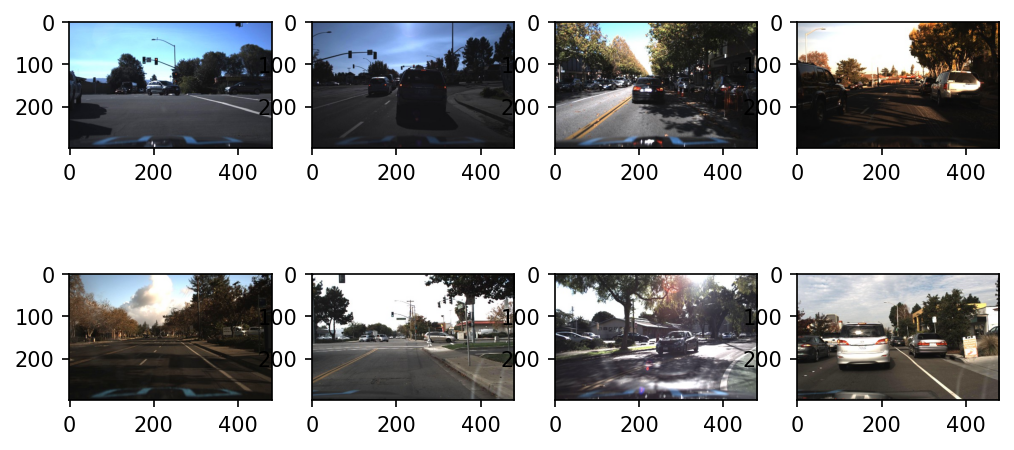

In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image as IMG

# fig,axes = plt.subplots(nrows=2, ncols=4,figsize=[8,4],dpi=150)
# axes = axes.ravel()

# for i,file in enumerate(group_1['frame'].sample(n=8).values):
#   img = IMG.open(os.path.join(img_path,file))
#   axes[i-1].imshow(img)


#### Class2

In [ ]:
# group_2 = group_class_id.get_group(2)
# # len(group_2) #6313
# group_2.head()

frame  xmin  xmax  ymin  ymax  class_id
3   1478019953689774621.jpg   171   182   141   154         2
8   1478019954186238236.jpg   165   177   140   154         2
13  1478019954685370994.jpg   160   173   140   153         2
17  1478019955185244088.jpg   154   169   139   153         2
22  1478019955679801306.jpg   149   166   138   153         2

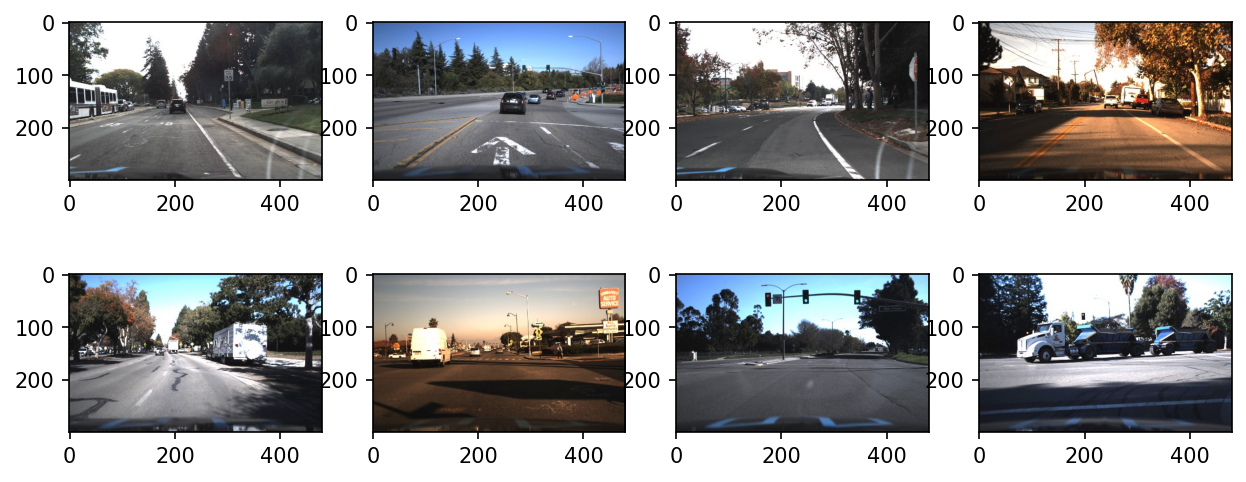

In [ ]:
# fig2,axes2 = plt.subplots(nrows=2, ncols=4,figsize=[10,4],dpi=150)
# axes2 = axes2.ravel()

# for i,file in enumerate(group_2['frame'].sample(n=8).values):
#   img = IMG.open(os.path.join(img_path,file))
#   axes2[i-1].imshow(img)

#### Class 3

In [ ]:
# group_3 = group_class_id.get_group(3)
# # len(group_3) #10637
# group_3.head()

frame  xmin  xmax  ymin  ymax  class_id
1   1478019952686311006.jpg   437   454   120   186         3
63  1478019961680640592.jpg   264   271   139   155         3
69  1478019962181150666.jpg   268   275   138   156         3
76  1478019962681840550.jpg   271   280   137   156         3
82  1478019963181283434.jpg   278   287   138   158         3

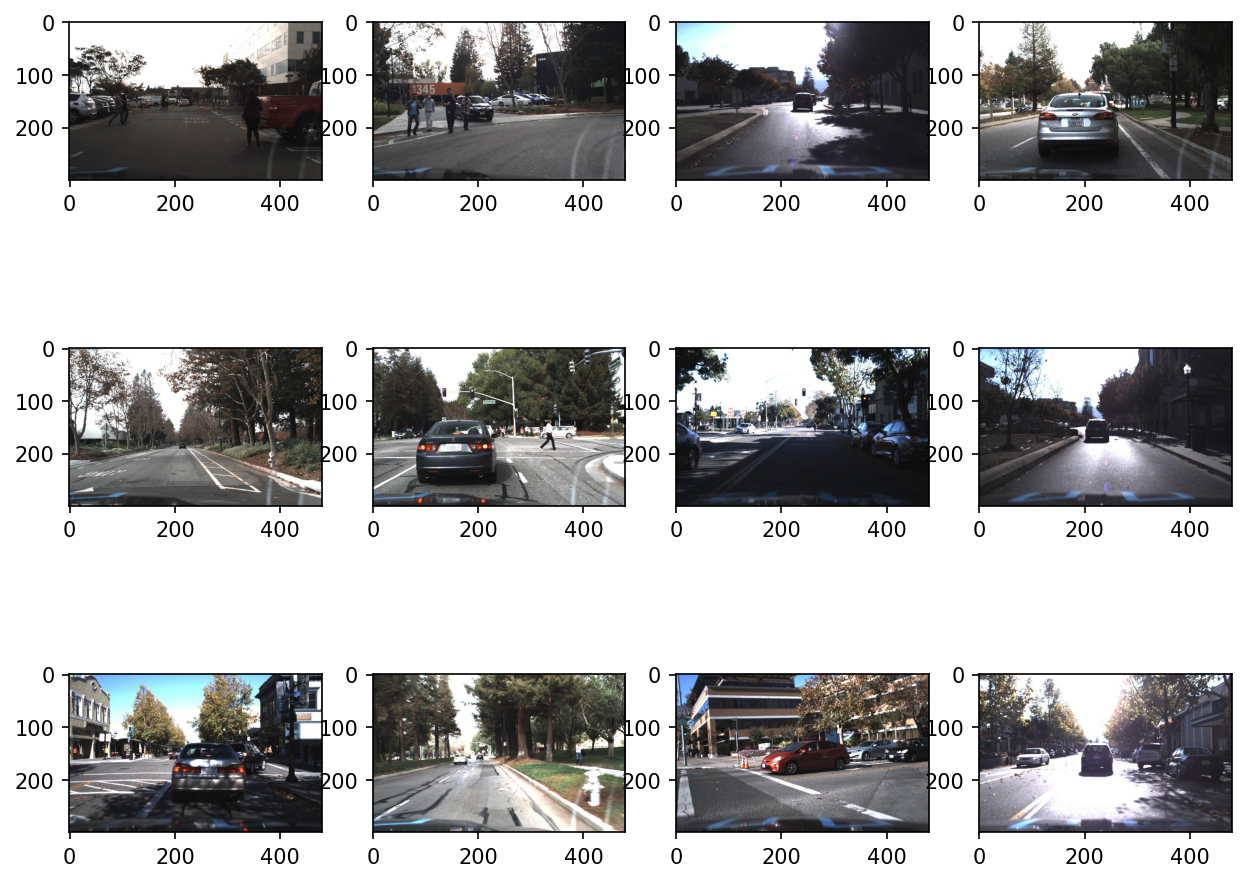

In [ ]:
# fig3,axes3 = plt.subplots(nrows=3, ncols=4,figsize=[10,8],dpi=150)
# axes3 = axes3.ravel()

# for i,file in enumerate(group_3['frame'].sample(n=12).values):
#   img = IMG.open(os.path.join(img_path,file))
#   axes3[i-1].imshow(img)

#### class4

In [ ]:
# group_4 = group_class_id.get_group(4)
# # len(group_4) #1442
# group_4.head()

frame  xmin  xmax  ymin  ymax  class_id
159  1478019971686116476.jpg   146   159   142   151         4
166  1478019971686116476.jpg   214   227   135   150         4
169  1478019972180014279.jpg   124   138   142   152         4
181  1478019972685986697.jpg   104   117   141   152         4
194  1478019973185520968.jpg    83    97   141   153         4

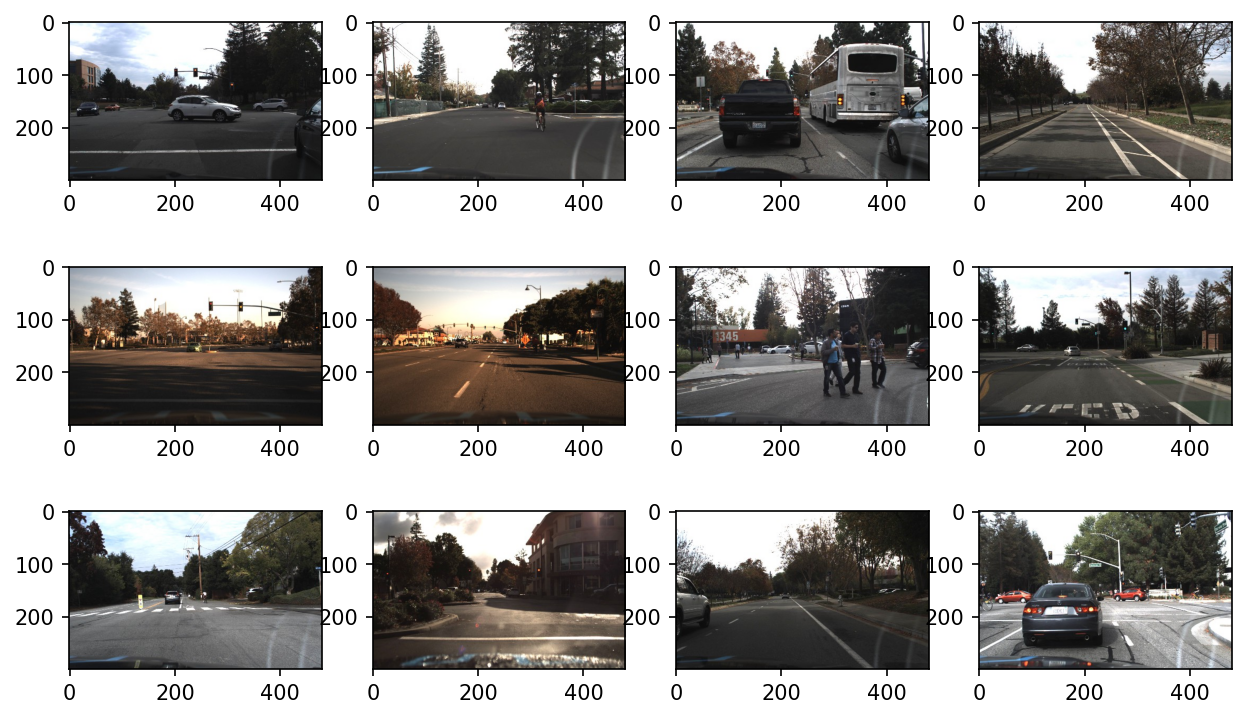

In [ ]:
# fig4,axes4 = plt.subplots(nrows=3, ncols=4,figsize=[10,6],dpi=150)
# axes4 = axes4.ravel()

# for i,file in enumerate(group_4['frame'].sample(n=12).values):
#   img = IMG.open(os.path.join(img_path,file))
#   axes4[i-1].imshow(img)

#### Class 5

In [ ]:
# group_5 = group_class_id.get_group(5)
# # len(group_5) #12700
# group_5.head()

frame  xmin  xmax  ymin  ymax  class_id
100  1478019965181415731.jpg   230   235   127   135         5
105  1478019965682301515.jpg   231   237   127   135         5
110  1478019966187511711.jpg   231   237   126   135         5
115  1478019966688931929.jpg   233   238   126   134         5
119  1478019967180239928.jpg   230   236   125   134         5

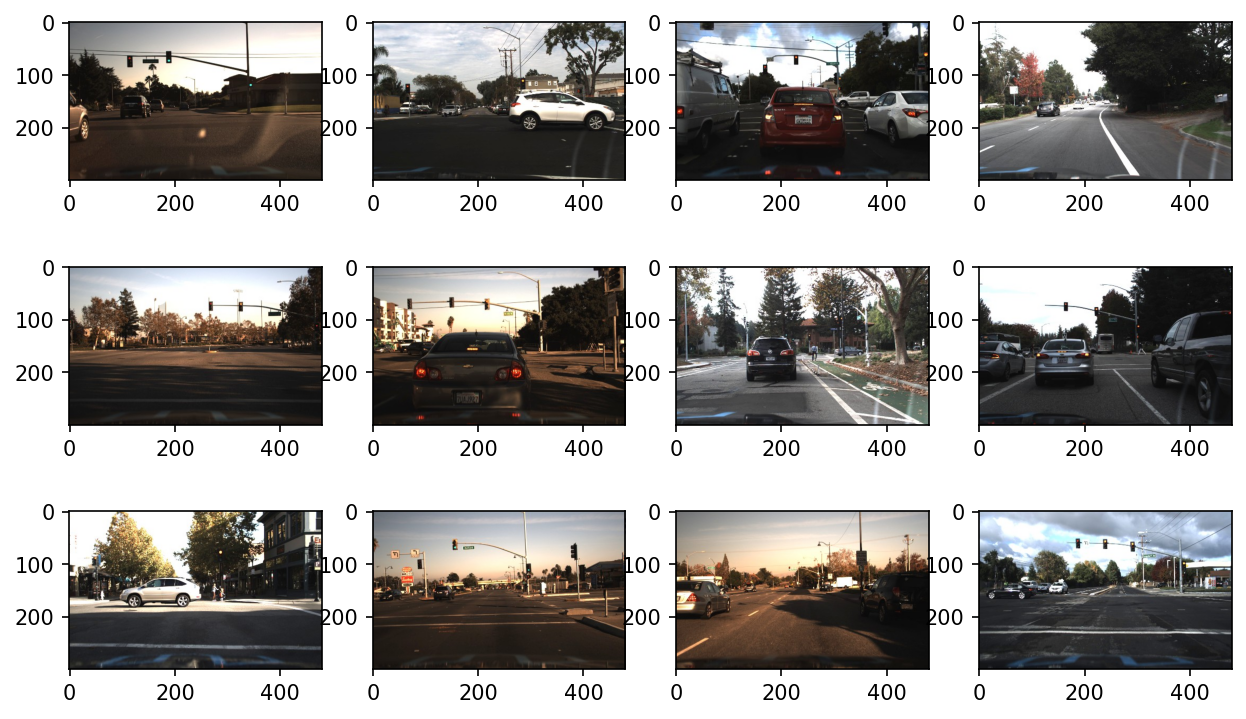

In [ ]:
# fig5,axes5 = plt.subplots(nrows=3, ncols=4,figsize=[10,6],dpi=150)
# axes5 = axes5.ravel()

# for i,file in enumerate(group_5['frame'].sample(n=12).values):
#   img = IMG.open(os.path.join(img_path,file))
#   axes5[i-1].imshow(img)

In [ ]:
group_images = df.groupby('frame')
# group_images.first()
group_images.count()

xmin  xmax  ymin  ymax  class_id
frame                                                    
1478019952686311006.jpg     2     2     2     2         2
1478019953180167674.jpg     1     1     1     1         1
1478019953689774621.jpg     5     5     5     5         5
1478019954186238236.jpg     5     5     5     5         5
1478019954685370994.jpg     4     4     4     4         4
...                       ...   ...   ...   ...       ...
1479506173475582156.jpg    10    10    10    10        10
1479506173994033498.jpg    12    12    12    12        12
1479506174991516375.jpg    10    10    10    10        10
1479506175971257681.jpg     7     7     7     7         7
1479506176491553178.jpg     8     8     8     8         8

[18000 rows x 5 columns]

### Creating annotation file to each image

In [29]:
grouped_df = train_df.groupby("frame", group_keys=True).apply(lambda x: x)

In [30]:
grouped_df.head(20)

frame  xmin  xmax  ymin  ymax  \
frame                                                                         
1478019952686311006.jpg 0   1478019952686311006.jpg   237   251   143   155   
                        1   1478019952686311006.jpg   437   454   120   186   
1478019953180167674.jpg 2   1478019953180167674.jpg   218   231   146   158   
1478019953689774621.jpg 3   1478019953689774621.jpg   171   182   141   154   
                        4   1478019953689774621.jpg   179   191   144   155   
                        5   1478019953689774621.jpg   206   220   145   156   
                        6   1478019953689774621.jpg   385   420   122   152   
                        7   1478019953689774621.jpg   411   462   124   148   
1478019954186238236.jpg 8   1478019954186238236.jpg   165   177   140   154   
                        9   1478019954186238236.jpg   171   182   144   157   
                        10  1478019954186238236.jpg   200   214   145   157   
                        11  1478019954186238236.jpg   362   430   118   149   
                        12  1478019954186238236.jpg   433   479   124   148   
1478019954685370994.jpg 13  1478019954685370994.jpg   160   173   140   153   
                        14  1478019954685370994.jpg   165   177   144   156   
                        15  1478019954685370994.jpg   194   207   144   156   
                        16  1478019954685370994.jpg   373   457   118   152   
1478019955185244088.jpg 17  1478019955185244088.jpg   154   169   139   153   
                        18  1478019955185244088.jpg   160   172   144   155   
                        19  1478019955185244088.jpg   189   203   142   154   

                            class_id  
frame                                 
1478019952686311006.jpg 0          1  
                        1          3  
1478019953180167674.jpg 2          1  
1478019953689774621.jpg 3          2  
                        4          1  
                        5          1  
                        6          1  
                        7          1  
1478019954186238236.jpg 8          2  
                        9          1  
                        10         1  
                        11         1  
                        12         1  
1478019954685370994.jpg 13         2  
                        14         1  
                        15         1  
                        16         1  
1478019955185244088.jpg 17         2  
                        18         1  
                        19         1

In [31]:
IMAGES_PATH = "/mydrive/YOLO_Data/kaggleData/images"
TRAIN_LABELS = "/mydrive/YOLO_Data/kaggleData/labels_train.csv"
VAL_LABELS = "/mydrive/YOLO_Data/kaggleData/labels_trainval.csv"
TEST_LABELS = "/mydrive/YOLO_Data/kaggleData/labels_val.csv"

TARGET_TRAIN_IMG = "/mydrive/YOLO_Data/kaggleData/dataset/images/train"
TARGET_VAL_IMG = "/mydrive/YOLO_Data/kaggleData/dataset/images/val"
TARGET_TRAIN_LBL = "/mydrive/YOLO_Data/kaggleData/dataset/Labels/train_labels"
TARGET_VAL_LBL = "/mydrive/YOLO_Data/kaggleData/dataset/Labels/val_labels"

In [ ]:
# os.makedirs("dataset/images/train")
# os.makedirs("dataset/images/val")
# os.makedirs("dataset/labels/train")
# os.makedirs("dataset/labels/val")

In [34]:
import shutil
import os

def createYOLOdataset(sourceImg, sourceLab, targetImg, targetLab):
    labels = pd.read_csv(sourceLab)
    print(labels.head())

    for index, row in labels.iterrows():
        img_path = sourceImg + '/' + row['frame']
        target = targetImg + '/' + row['frame']
        file = targetLab + '/' + row['frame'][:-3] + 'txt'
        obj_class = row['class_id'] - 1
        xmin, xmax, ymin, ymax = row['xmin'] / 480.0, row['xmax'] / 480.0, row['ymin'] / 320.0, row['ymax'] / 320.0
        x = (xmin + xmax) / 2.0
        y = (ymin + ymax) / 2.0
        w = (xmax - xmin)
        h = (ymax - ymin)
        string = str(obj_class) + ' ' + str(x) + ' ' + str(y) + ' ' + str(w) + ' ' + str(h)

        if os.path.isfile(file):
            string = '\n' + string

        assert(obj_class < 5)

        with open(file, 'a') as f:
            f.write(string)

        shutil.copyfile(img_path, target)

In [36]:
# create annotation file for each image for training
createYOLOdataset(IMAGES_PATH, TRAIN_LABELS, TARGET_TRAIN_IMG, TARGET_TRAIN_LBL)

                     frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
1  1478019952686311006.jpg   437   454   120   186         3
2  1478019953180167674.jpg   218   231   146   158         1
3  1478019953689774621.jpg   171   182   141   154         2
4  1478019953689774621.jpg   179   191   144   155         1


In [39]:
# check whether that the file has written all the values

# import os
count = 0
# Iterate directory
for path in os.listdir(TARGET_TRAIN_LBL):
    # check if current path is a file
    if os.path.isfile(os.path.join(TARGET_TRAIN_LBL, path)):
        count += 1
print('File count:', count)

File count: 18000


In [ ]:
# create annotation file for each image for testing
createYOLOdataset(IMAGES_PATH, TEST_LABELS, TARGET_VAL_IMG, TARGET_VAL_LBL)

# YOLO V4 implementation with the darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/gdrive/MyDrive/YOLO_Data/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
# pretrained YOLO weights for the COCO dataset
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)